In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
test=pd.read_csv('bigmarttest.csv')

In [3]:
train=pd.read_csv('bigdatamart_Train.csv')

In [4]:
train['source']='train'
test['source']='test'
test['Item_Outlet_Sales']=0

In [5]:
df=pd.concat([train,test],sort=False)

In [6]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,test
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,test
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0000,test
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0.0000,test


In [7]:
df.shape

(14204, 13)

In [8]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [9]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [10]:
df['Item_Identifier'].nunique()

1559

In [11]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [12]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

There are two categories of fats i.e. Low Fat and Regular with some typos as LF and reg and low fat.So we need to categorize it into two type of fats.

In [13]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [14]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [15]:
df['Item_Type'].nunique()

16

In [16]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [17]:
df['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT035    1550
OUT046    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [18]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [19]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [20]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [21]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [22]:
df['Outlet_Size'].isnull().sum()

4016

In [23]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [24]:
df['Outlet_Location_Type'].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [25]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [26]:
df['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [27]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

We found two variables with missing values.We need to impute data in place of missing values.

In [28]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


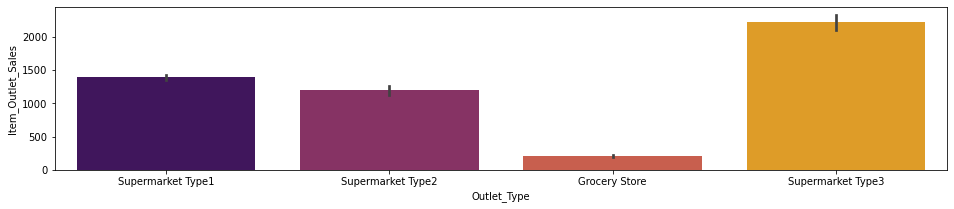

In [29]:
plt.figure(figsize=(16,3))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df,palette='inferno')
plt.show()

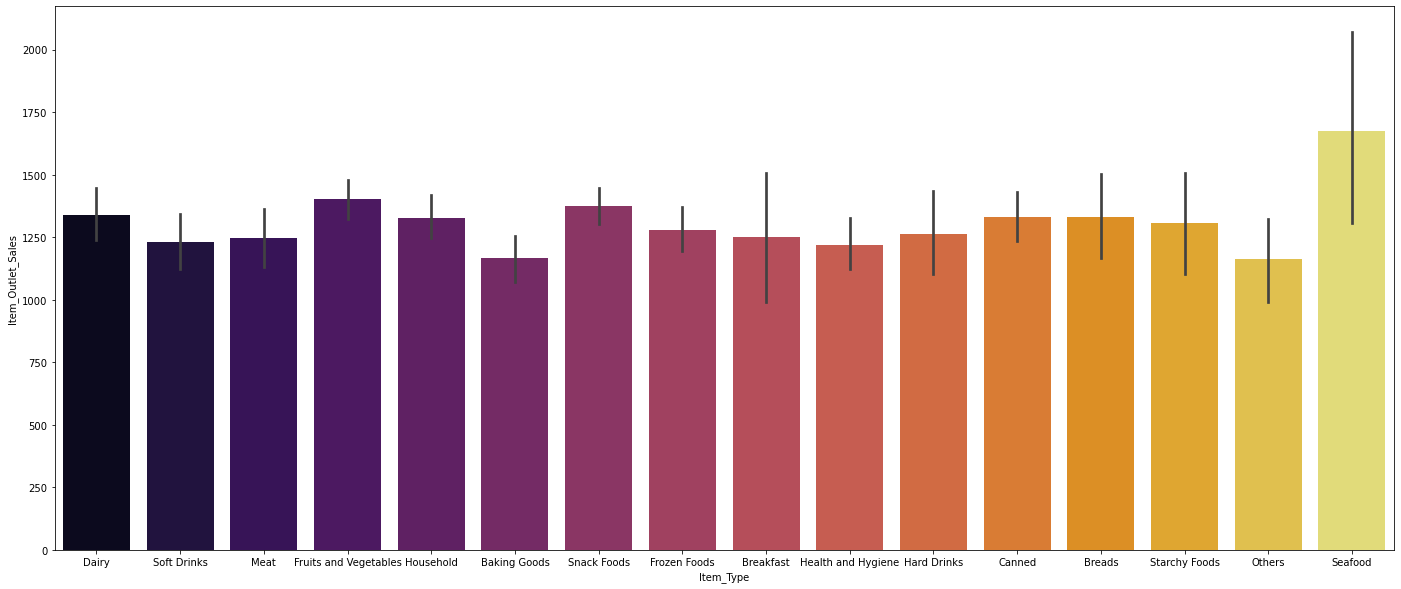

In [30]:
plt.figure(figsize=(24,10))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=df,palette='inferno')
plt.show()

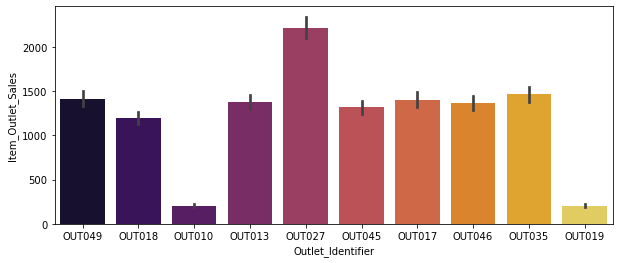

In [31]:
plt.figure(figsize=(10,4))
sns.barplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df,palette='inferno')
plt.show()

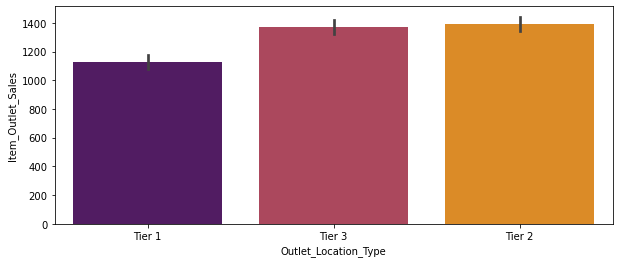

In [32]:
plt.figure(figsize=(10,4))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df,palette='inferno')
plt.show()

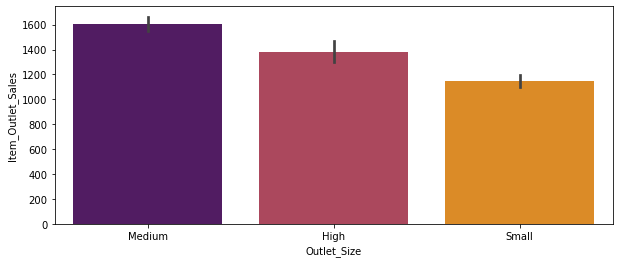

In [33]:
plt.figure(figsize=(10,4))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df,palette='inferno')
plt.show()

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
imp=SimpleImputer(strategy='mean')
df['Item_Weight']=imp.fit_transform(df['Item_Weight'].values.reshape(-1,1))
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,test
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,test
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0000,test
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0.0000,test


In [70]:
df['Item_Weight'].isnull().sum()

0

In [9]:
impt=SimpleImputer(strategy='most_frequent')
df['Outlet_Size']=impt.fit_transform(df['Outlet_Size'].values.reshape(-1,1))
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,test
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,test
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,0.0000,test
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,0.0000,test


In [10]:
df['Outlet_Size'].isnull().sum()

0

In [11]:
print((df['Item_Visibility']==0).value_counts())

False    13325
True       879
Name: Item_Visibility, dtype: int64


In [12]:
missing_values=(df['Item_Visibility']==0)

Finding average visibility of each Item and imputing it in missing values of item visibility.

In [13]:
vis_avg=df.pivot_table(values='Item_Visibility',index='Item_Identifier')

In [14]:
df.loc[missing_values,'Item_Visibility']=df.loc[missing_values,'Item_Identifier'].apply(lambda x: vis_avg.at[x,'Item_Visibility'])

In [15]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,test
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,test
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,0.0000,test
5679,FDJ26,15.30,Regular,0.088380,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,0.0000,test


In [16]:
print((df['Item_Visibility']==0).value_counts())

False    14204
Name: Item_Visibility, dtype: int64


In [17]:
df['Outlet_Years']=2009-df['Outlet_Establishment_Year']

#Getting the first two letter of ID, for FD:Food,DR:Drinks,NC: Non_consumable

In [18]:
df['Item_Type_Combined']=df['Item_Identifier'].apply(lambda x: x[0:2])

In [19]:
df['Item_Type_Combined']=df['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [20]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modifying Categories of Item_Fat_Content 

In [21]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [22]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,10,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,10,Food
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,11,Food
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,22,Non-Consumable


Encoding the categorical values

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le=LabelEncoder()
var_mod=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet_Identifier']
for i in var_mod:
    df[i]=le.fit_transform(df[i])

In [25]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,Item_Type_Combined
0,FDA15,9.30,0,0.016047,Dairy,249.8092,9,1999,1,0,1,3735.1380,train,10,1
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,3,2009,1,2,2,443.4228,train,0,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,9,1999,1,0,1,2097.2700,train,10,1
3,FDX07,19.20,1,0.017834,Fruits and Vegetables,182.0950,0,1998,1,2,0,732.3800,train,11,1
4,NCD19,8.93,0,0.009780,Household,53.8614,1,1987,0,2,1,994.7052,train,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,1,0.013496,Snack Foods,141.3154,8,1997,2,0,1,0.0000,test,12,1
5677,FDD47,7.60,1,0.142991,Starchy Foods,169.1448,3,2009,1,2,2,0.0000,test,0,1
5678,NCO17,10.00,0,0.073529,Health and Hygiene,118.7440,7,2002,1,1,1,0.0000,test,7,2
5679,FDJ26,15.30,1,0.088380,Canned,214.6218,2,2007,1,1,1,0.0000,test,2,1


In [26]:
df.drop(['Item_Identifier','Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [27]:
df.dtypes

Item_Weight             float64
Item_Fat_Content          int32
Item_Visibility         float64
Item_MRP                float64
Outlet_Identifier         int32
Outlet_Size               int32
Outlet_Location_Type      int32
Outlet_Type               int32
Item_Outlet_Sales       float64
source                   object
Outlet_Years              int64
Item_Type_Combined        int32
dtype: object

<AxesSubplot:>

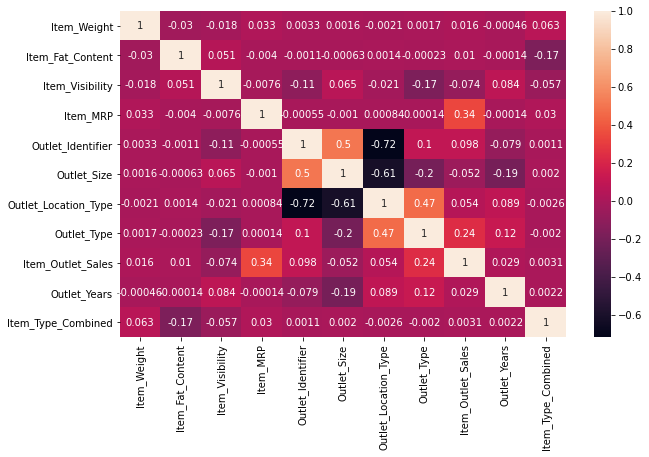

In [56]:
plt.figure(figsize=(10,6))                        #figure size
sns.heatmap(df.corr(),annot=True)

In [28]:
train=df.loc[df['source']=="train"]
test=df.loc[df['source']=="test"]           

In [30]:
train.drop(['source'],axis=1,inplace=True)

In [31]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_Combined
0,9.300,0,0.016047,249.8092,9,1,0,1,3735.1380,10,1
1,5.920,1,0.019278,48.2692,3,1,2,2,443.4228,0,0
2,17.500,0,0.016760,141.6180,9,1,0,1,2097.2700,10,1
3,19.200,1,0.017834,182.0950,0,1,2,0,732.3800,11,1
4,8.930,0,0.009780,53.8614,1,0,2,1,994.7052,22,2
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1,0,2,1,2778.3834,22,1
8519,8.380,1,0.046982,108.1570,7,1,1,1,549.2850,7,1
8520,10.600,0,0.035186,85.1224,6,2,1,1,1193.1136,5,2
8521,7.210,1,0.145221,103.1332,3,1,2,2,1845.5976,0,1


In [32]:
test.drop(['source','Item_Outlet_Sales'],axis=1,inplace=True)

In [33]:
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,Item_Type_Combined
0,20.750000,0,0.007565,107.8622,9,1,0,1,10,1
1,8.300000,1,0.038428,87.3198,2,1,1,1,2,1
2,14.600000,0,0.099575,241.7538,0,1,2,0,11,2
3,7.315000,0,0.015388,155.0340,2,1,1,1,2,1
4,12.792854,1,0.118599,234.2300,5,1,2,3,24,1
...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,141.3154,8,2,0,1,12,1
5677,7.600000,1,0.142991,169.1448,3,1,2,2,0,1
5678,10.000000,0,0.073529,118.7440,7,1,1,1,7,2
5679,15.300000,1,0.088380,214.6218,2,1,1,1,2,1


In [34]:
x=train.drop(['Item_Outlet_Sales'],axis=1)
y=train['Item_Outlet_Sales']

In [35]:
y.shape

(8523,)

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [38]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred3=rf.predict(x_test)
print('Mean squared error RF:',mean_squared_error(y_test,pred3))
print(r2_score(y_test,pred3))

Mean squared error SV: 1290530.1765696874
0.563695494702589


In [50]:
dt=DecisionTreeRegressor(max_depth=5)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
predk=dt.predict(x_test)
print('Mean squared error DT:',mean_squared_error(y_test,predk))
print(r2_score(y_test,predk))

Mean squared error DT: 1187345.6656060074
0.5985802791328372


In [40]:
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)
pred1=lm.predict(x_test)
print('Mean squared error LM:',mean_squared_error(y_test,pred1))
print(r2_score(y_test,pred1))

Mean squared error LR: 1468065.9448568854
0.5036739183291992


In [47]:
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)
kn.score(x_train,y_train)
predknn=kn.predict(x_test)
print('Mean squared error KN:',mean_squared_error(y_test,predknn))
print(r2_score(y_test,predknn))

Mean squared error KN: 1448641.7938632679
0.5102408663509952


In [111]:
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,Item_Type_Combined
0,20.750000,0,0.007565,107.8622,9,1,0,1,10,1
1,8.300000,1,0.038428,87.3198,2,1,1,1,2,1
2,14.600000,0,0.099575,241.7538,0,1,2,0,11,2
3,7.315000,0,0.015388,155.0340,2,1,1,1,2,1
4,12.792854,1,0.118599,234.2300,5,1,2,3,24,1
...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,141.3154,8,2,0,1,12,1
5677,7.600000,1,0.142991,169.1448,3,1,2,2,0,1
5678,10.000000,0,0.073529,118.7440,7,1,1,1,7,2
5679,15.300000,1,0.088380,214.6218,2,1,1,1,2,1


In [112]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_Combined
0,9.300,0,0.016047,249.8092,9,1,0,1,3735.1380,10,1
1,5.920,1,0.019278,48.2692,3,1,2,2,443.4228,0,0
2,17.500,0,0.016760,141.6180,9,1,0,1,2097.2700,10,1
3,19.200,1,0.017834,182.0950,0,1,2,0,732.3800,11,1
4,8.930,0,0.009780,53.8614,1,0,2,1,994.7052,22,2
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1,0,2,1,2778.3834,22,1
8519,8.380,1,0.046982,108.1570,7,1,1,1,549.2850,7,1
8520,10.600,0,0.035186,85.1224,6,2,1,1,1193.1136,5,2
8521,7.210,1,0.145221,103.1332,3,1,2,2,1845.5976,0,1


In [41]:
p=np.array([5.920,1,0.019278,48.2692,3,1,2,1,0,0])
p=p.reshape(1,-1)        #reshaped into 2D data,where -1:Many columns,1:number of rows
p.shape

(1, 10)

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
print(cross_val_score(lm,x,y,cv=10).mean())

0.5074894417016578


In [46]:
print(cross_val_score(rf,x,y,cv=10).mean())

0.5501137223396484


In [51]:
print(cross_val_score(dt,x,y,cv=10).mean())

0.5882153391371229


In [52]:
print(cross_val_score(kn,x,y,cv=10).mean())

0.5135012033838865


In [56]:
from sklearn.model_selection import GridSearchCV

In [54]:
parameter={'max_depth':[3,5,7,9,10],
          'criterion':["squared_error", "mse", "friedman_mse", "absolute_error"],
           'splitter':["best", "random"],
          'max_features':['auto','sqrt','log2']}

In [57]:
GCV=GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [58]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [3, 5, 7, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [59]:
GCV.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [62]:
final_mod=DecisionTreeRegressor(max_depth=5,criterion='squared_error',splitter='best',max_features='auto')
final_mod.fit(x_train,y_train)
predi=final_mod.predict(x_test)
print('Mean squared error:',mean_squared_error(y_test,predi))
print(r2_score(y_test,predi))

Mean squared error: 1187345.6656060074
0.5985802791328371


In [64]:
import joblib
joblib.dump(final_mod,'bigmart.obj')
mod_from_joblib=joblib.load('bigmart.obj')